In [1]:
import pandas as pd
import os
os.chdir(r"C:\Users\hrishi bele\OneDrive\sem7\Recommender_systems\Assignment's\ass1\samsung_HAR")
df_train = pd.read_csv(r'samsung_train.csv',header=None)
df_test = pd.read_csv("samsung_test.csv",header=None)

In [36]:
#getting training labels
col=[]
with open(r'samsung_train_labels.txt', 'r') as f:
    for line in f:
        col.append(line[:1])
#adding label column to current dataframe       
train_labels=pd.DataFrame( col,columns=['label'])
#getting testing labels
col3=[]
with open(r'samsung_test_labels.txt', 'r') as f:
    for line in f:
        col3.append(line[:1])
#adding label column to current dataframe       
test_labels=pd.DataFrame( col3,columns=['label'])

In [37]:
#assigning headers to columns from text file.
#since there are two columns in txt file we split each line and store first and second in diff list's
col1,col2 = [], []
with open(r'features.txt', 'r') as f:
    for line in f:
        first, second = line.split()
        col1.append(first)
        col2.append(second)
#assigning feater names to our dataframe
df_train.columns = [col2]

In [38]:
from sklearn.decomposition import PCA
#n_components=0.90 means select the number of components such that 90% of variance of original data is preserved
pca = PCA(n_components=0.90).fit(df_train)
#no of components representing 90% of variance
pca.n_components_

34

In [46]:
#new dataframe with  34 components
pca = PCA(n_components=34)
principalComponents = pca.fit_transform(df_train)
new_df = pd.DataFrame(data = principalComponents)
new_df

'''
plt.title("PCA ")
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c='gray', cmap=plt.cm.Spectral)
plt.show()
'''

'\nplt.title("PCA ")\nplt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=\'gray\', cmap=plt.cm.Spectral)\nplt.show()\n'

In [39]:
#clustering obs into 6 clusters 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)
kmeans.fit(df_train)
kmeans.labels_[19:89]
#kmeans.score(data_test,data_test_label)

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 4, 0, 0])

C:\anaconda-installation\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\anaconda-installation\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\anaconda-installation\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\anaconda-installation\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\anaconda-installation\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number 

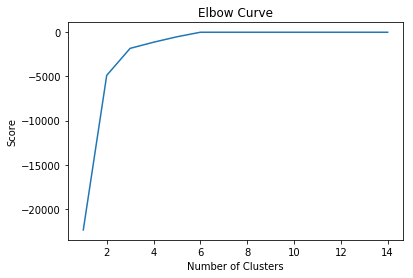

In [40]:
#finding k using elbow method
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as pl


noc = range(1, 15)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(train_labels).score(train_labels) for i in range(len(kmeans))]
pl.plot(noc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show() 

In [19]:
#loading MNIST test and training dataset 
from mlxtend.data import loadlocal_mnist
X, y = loadlocal_mnist(images_path=r'train-images.idx3-ubyte', labels_path=r'train-labels.idx1-ubyte')
X_test, y_test = loadlocal_mnist(images_path=r't10k-images.idx3-ubyte', labels_path=r't10k-labels.idx1-ubyte')

In [42]:
#applying pca
from sklearn.decomposition import PCA
pca = PCA(0.95).fit(X)
from sklearn.decomposition import PCA
pca1 = PCA(n_components=pca.n_components_)
principalComponents_ = pca1.fit_transform(X)
principaldf_ = pd.DataFrame(data = principalComponents1)                     
print(principaldf_)

,0,1,2,3,4,5,6,7,8,9,...,144,145,146,147,148,149,150,151,152,153
0,123.932589,-312.674262,-24.514052,-555.757958,-27.296668,-232.476284,233.995734,159.799494,-363.515019,198.428073,...,12.028270,-12.919012,31.755620,-69.384191,7.381812,-38.517466,29.318422,44.889257,-42.279428,-42.632916
1,1011.718376,-294.857038,596.339561,-460.766197,-827.275222,-181.950527,-45.020477,-104.969589,40.459114,150.968907,...,23.870349,7.052338,-0.560170,7.672945,55.773549,3.750447,-16.664116,40.927890,14.054697,42.856137
2,-51.849608,392.173153,-188.509750,521.011348,-306.680729,-1.835346,-859.047197,368.591877,-114.546070,-178.508148,...,10.318668,-9.978739,68.122197,44.510664,59.797070,86.337115,97.778178,-44.434005,-7.311256,60.443258
3,-799.127037,-607.197217,273.651240,105.878237,-1.853226,699.654696,-473.713203,-67.321706,302.731265,11.111366,...,9.706082,-22.061173,19.672140,-49.170706,18.150463,-5.143325,-12.843139,22.763253,-24.356739,6.828370
4,-382.754942,730.542867,16.353747,-241.697519,98.161346,43.229727,-91.666600,-405.554887,225.501856,104.112267,...,18.145456,30.260747,25.424943,-16.216474,-48.990867,73.149497,-47.386239,1.627927,-15.734711,35.790108
5,184.468870,221.332004,591.359527,51.906096,327.400141,310.680812,-31.622253,98.579228,-47.029275,109.625374,...,30.875121,29.306718,-18.855060,-35.246882,-6.886058,94.930190,-17.216252,49.337092,43.453756,28.071938
6,-726.513985,-156.985561,-248.190788,72.384127,-133.263186,-503.849044,356.040130,-156.893867,-226.845997,459.088119,...,-29.733216,-34.675595,4.886514,-27.632448,44.851733,6.699282,22.201528,-67.190533,15.415298,5.359606
7,513.344896,-310.773265,-104.080456,-882.255322,684.314403,346.473477,-502.436021,250.841749,-494.308298,63.139851,...,16.761437,-2.451679,29.411153,-19.918466,12.211453,59.141193,-27.939456,54.501417,-42.037719,87.484272
8,-868.906770,-81.547158,-133.417529,76.009836,-504.609928,-385.840077,124.991293,-219.184517,-229.228953,239.484814,...,4.857247,10.869736,6.852208,-25.843365,-15.210406,42.571744,27.080100,46.123810,-13.210140,39.212004
9,-304.730564,465.597196,692.382693,92.398955,35.403604,-26.549883,-446.209500,55.314679,-30.753420,-499.674755,...,47.689551,7.567838,27.716385,-1.563928,-17.749647,7.880304,-57.210896,-26.948080,-41.125944,23.338903


In [33]:
principalComponents[:, 0]

array([-5.5201921 , -5.53556357, -5.47539104, ...,  5.85772085,
        5.42103251,  5.49738573])

In [44]:
#clustering obs into clusters 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
kmeans.labels_[19:89]
#kmeans.score(data_test,data_test_label)

array([2, 0, 3, 2, 2, 2, 1, 0, 1, 1, 2, 2, 2, 2, 2, 3, 2, 1, 3, 0, 3, 2,
       1, 0, 2, 2, 0, 1, 2, 1, 1, 1, 3, 0, 2, 0, 0, 3, 0, 0, 2, 3, 2, 1,
       3, 3, 2, 3, 2, 1, 1, 2, 0, 2, 2, 1, 3, 1, 2, 2, 0, 1, 3, 3, 3, 0,
       1, 1, 0, 3])

In [45]:
#em algo
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4).fit(X)
'''labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');
probs = gmm.predict_proba(X)
print(probs[:5].round(3))'''

"labels = gmm.predict(X)\nplt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');\nprobs = gmm.predict_proba(X)\nprint(probs[:5].round(3))"

In [29]:
test_labels

,label
0,5
1,5
2,5
3,5
4,5
5,5
6,5
7,5
8,5
9,5


In [34]:
 principalComponents[:, 1]

array([-0.29001501, -0.08253015,  0.2872325 , ..., -3.08188232,
       -3.42659706, -2.78979824])